# Предсказание стоимости страховки здоровья с помощью модели линейной регрессии

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

В представленном датасете содержится информация о затратах респондентов на страхование здоровья в зависимости от разных факторов - возраст, индекс массы тела (bmi) и других.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


В начале был проведен разведочный анализ данных - подсчитаны описательные статистики по признакам, построены графики распределения и др.

In [3]:
df.shape

(1338, 7)

Всего в наборе данных 1338 наблюдений и 7 признаков

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


В наборе данных все значения заполнены

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Описательная статистика по количественным признакам. Можно заметить, что стоимость страховки в датасете разнится от 1122 до 63770 условных единиц, причем 50% респондентов заплатили за страховку менее 9382 условных единиц.

In [6]:
df.describe(include = "object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
df["region"].value_counts(normalize = True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

Описательная статистика по качественным признакам. Значительная доля респондентов - не курящие (1064 из 1338). Чуть больше половины респондентов - мужчины (676 из 1338). Распределение респондентов по регионам равномерно, самый часто встречающийся регион - southeast - составляет лишь 27% всех наблюдений.

<AxesSubplot:xlabel='age', ylabel='Count'>

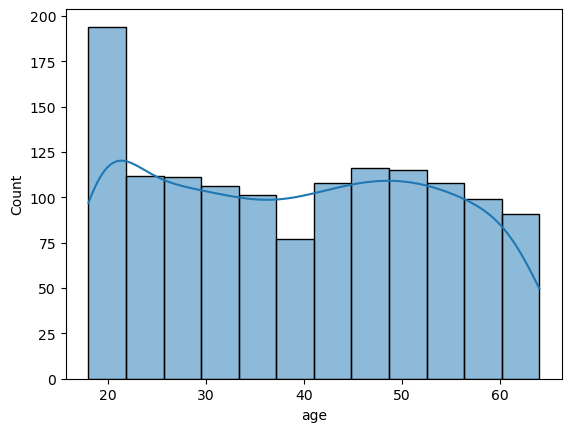

In [8]:
sns.histplot(df["age"], kde = True)

Возраст практически распределен равномерно. Больше всего в датасете респондентов молодого возраста, меньше всего - в возрасте около 40 лет.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

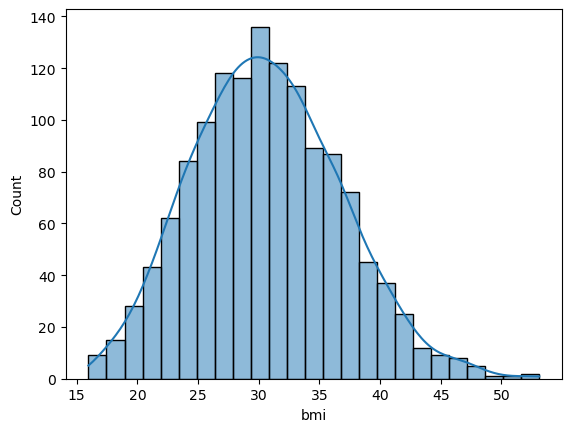

In [9]:
sns.histplot(df["bmi"], kde = True)

Распределение респондентов по индексу массы тела нормально, с наибольшей частотой около 30.

<AxesSubplot:xlabel='charges', ylabel='Count'>

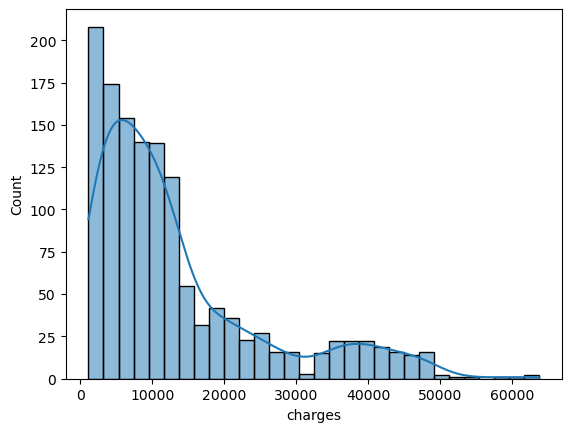

In [10]:
sns.histplot(df["charges"], kde = True)

Большинство респондентов заплатили небольшую сумму за страховку - после 10000 условных единиц кол-во респондентов резко падает.

<AxesSubplot:xlabel='children', ylabel='count'>

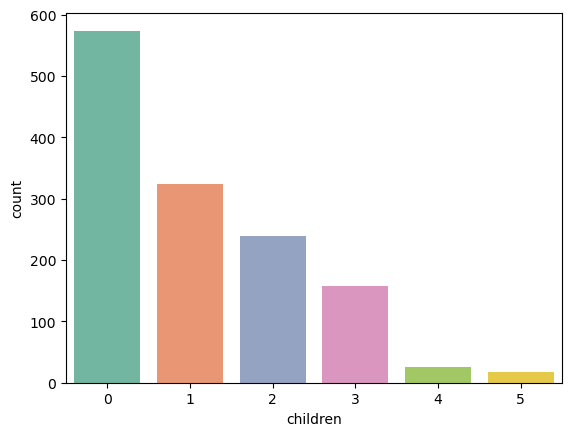

In [11]:
sns.countplot(data = df, x = "children", palette = "Set2")

In [12]:
df.groupby("children")["children"].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

В основном ресопнденты не имеют детей (574 из 1338). Чем больше кол-во детей, чем меньше ресопндентов, имеющих соответственное кол-во детей.

In [13]:
df_corr = df[["age", "bmi", "children", "charges"]].corr()
df_corr


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

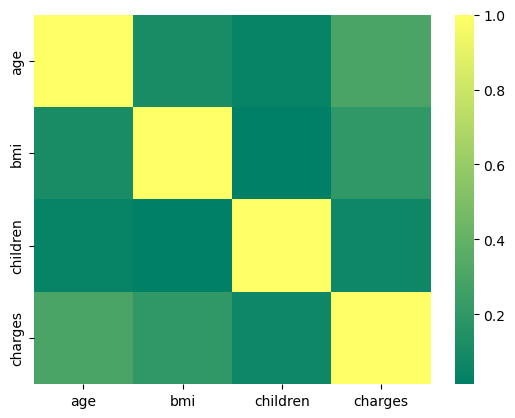

In [14]:
sns.heatmap(df_corr, cmap = "summer")

Количественные показатели слабо коррелирую между собой, максимальный корелляция достигается между возрастом и стоимостью страховки, равная примерно 0,3.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

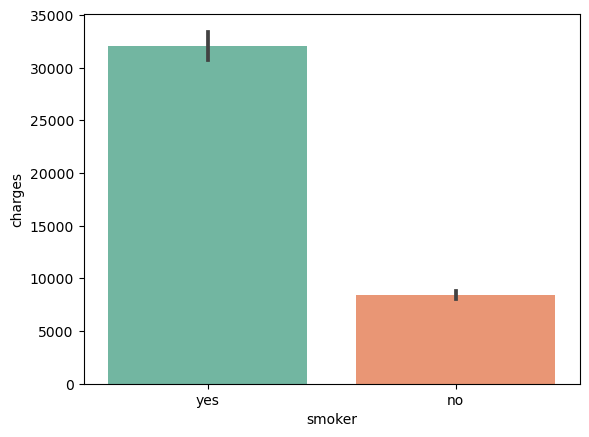

In [15]:
sns.barplot(x = df["smoker"], y = df["charges"], palette = "Set2")

In [16]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

В среднем у курильщиков стоимость страховки выше в 4 раза по сравнению с "некурильщиками".

<AxesSubplot:xlabel='sex', ylabel='charges'>

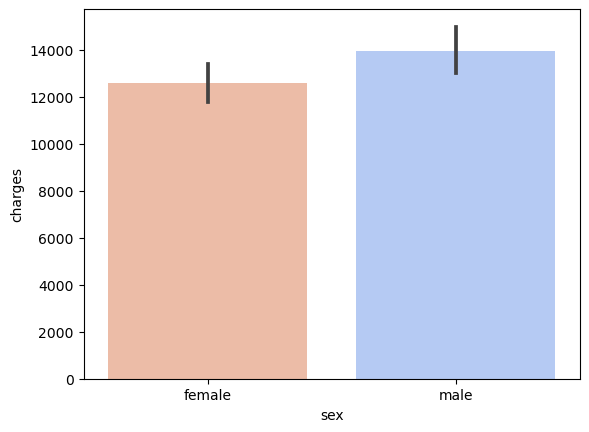

In [17]:
sns.barplot(x = df["sex"], y = df["charges"], palette = "coolwarm_r")

In [18]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

В среднем мужчины платят за страховку больше, чем женщины на около 1500 условных единиц.

<AxesSubplot:xlabel='region', ylabel='charges'>

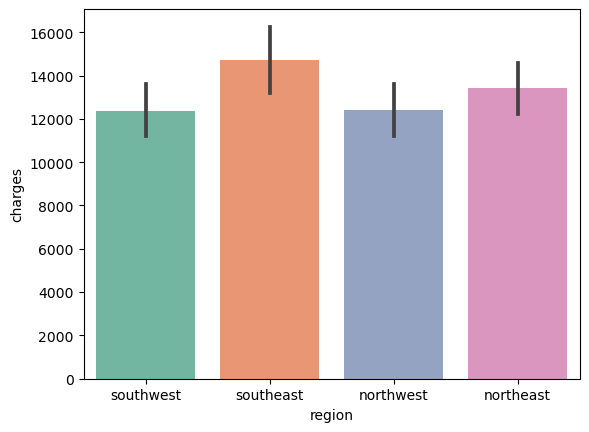

In [19]:
sns.barplot(x = df["region"], y = df["charges"], palette = "Set2")

In [20]:
df.groupby("region")["charges"].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

Средняя стоимость страховки по регионам слабо отличается. Наиболее отличительный регион - southeast, в котором за страховку платят более 14000 условных единиц.

<AxesSubplot:xlabel='sex', ylabel='charges'>

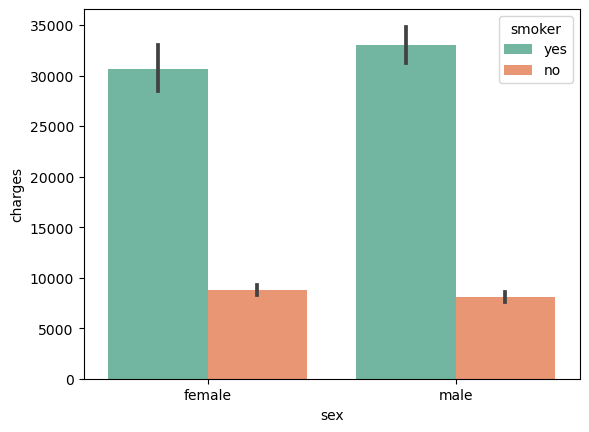

In [21]:
sns.barplot(x = df["sex"], y = df["charges"], hue = df["smoker"], palette = "Set2")

<AxesSubplot:xlabel='smoker', ylabel='charges'>

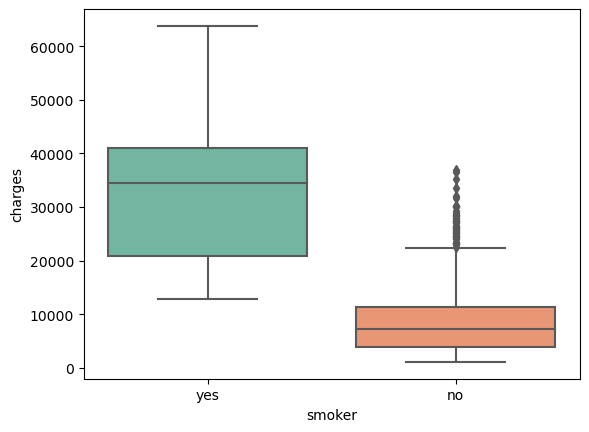

In [22]:
sns.boxplot(x = "smoker", y = "charges", data = df, palette = "Set2")

На графике "ящик с усами" можно увидеть выбросы у некурильщиков, которые по размеру страховки находятся в пределах интерквартильного размаха курильщиков

<AxesSubplot:xlabel='sex', ylabel='charges'>

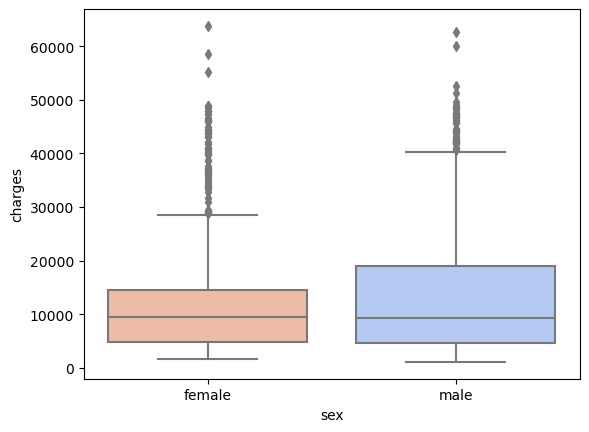

In [23]:
sns.boxplot(x = "sex", y = "charges", data = df, palette = "coolwarm_r")

<AxesSubplot:xlabel='region', ylabel='charges'>

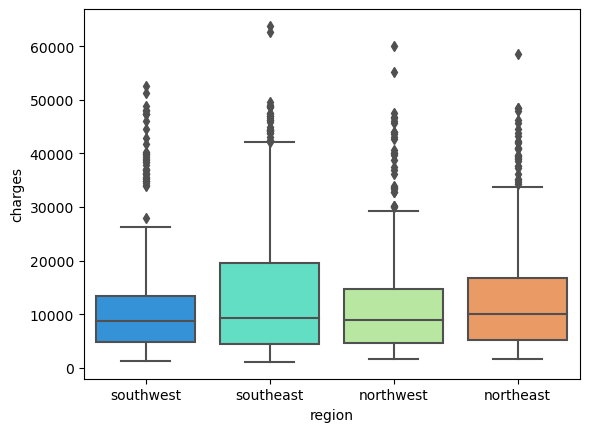

In [24]:
sns.boxplot(x = "region", y = "charges", data = df, palette = "rainbow")

Для построения модели регрессии нужно сформировать матрицу объект-признак и матрицу целевой переменной, т. е. стоимости страховки здоровья (поле charges)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
X = df.drop(["charges"], axis=1)
y = df['charges']

Далее датасет нужно разделить на обучающую и тестовую выборки, где доля тестовой выборки составляет четверть от набора данных

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((1003, 6), (335, 6))

Так как в модели могут применяться только числовые признаки, для них была сформирована кодировка OneHotEncoder. Количественные показатели были масштабированы в пределах от 0 до 1 с помощью MinMaxScaler, где 0 - минимум признака, а 1 - его максимум.

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['sex', 'smoker', 'region']
numeric_features = ["age", "bmi", "children"]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(drop='first', handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = column_transformer.fit_transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

Далее были применены наименования колонок для датасета и преобразование массива NumPy в объект DataFrame

In [29]:
lst = list(column_transformer.transformers_[0][1].get_feature_names_out())
lst.extend(numeric_features)

X_train_transformed = pd.DataFrame(X_train_transformed, columns=lst)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=lst)

X_train_transformed.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi,children
0,1.0,0.0,1.0,0.0,0.0,0.130435,0.207022,0.0
1,0.0,0.0,0.0,1.0,0.0,0.217391,0.283831,0.4
2,1.0,0.0,0.0,0.0,1.0,0.717391,0.638687,0.2
3,1.0,1.0,0.0,1.0,0.0,0.630435,0.541297,0.2
4,0.0,0.0,0.0,0.0,1.0,0.608696,0.348130,0.4


Данные готовы для построения модели линейной регрессии

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_transformed, y_train)

pred = model.predict(X_test_transformed)

In [31]:
pred[:10]

array([ 8952.20855705,  7053.79716786, 36888.36911226,  9522.49758674,
       26961.84638217, 10878.24576086,    89.95864742, 17048.24399155,
        1006.23867932, 11302.09430243])

In [32]:
model.coef_, model.intercept_

(array([   45.62242749, 23630.3989903 ,  -355.14862133,  -781.36838892,
         -860.26671223, 11942.68712197, 12630.55300389,  2132.51361372]),
 -2041.9383428322326)

In [33]:
importances = pd.DataFrame({'weights': model.coef_, 'features': X_train_transformed.columns}).sort_values(by='weights', ascending = False)
importances

,weights,features
1,23630.398990,smoker_yes
6,12630.553004,bmi
5,11942.687122,age
7,2132.513614,children
0,45.622427,sex_male
2,-355.148621,region_northwest
3,-781.368389,region_southeast
4,-860.266712,region_southwest


Наибольшее влияние на функцию регрессии имеет предиктор курильщика (которое увеличивает предсказанную стоимость аж на 23630 условных единиц), значение индекса массы тела и значение возраста.

В качестве оценки качества модели использована средняя квадратическая ошибка - наиболее популярная метрика

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)**0.5

5926.023602394471

Данная метрика довольно чувствительна к выбросам, которых в датасете немало. Поэтому в качестве альтернативной оценки ошибок использована средняя абсолютная ошибка

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred)

4243.654116653151

Как видно, среднее значение ошибки сократилось

Для вычисления относительной ошибки используется такая метрика как средняя абсолютная процентная ошибка:

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, pred)

0.4446818511698129

Процентная ошибка значительна - предсказанные значения отклонялись от истинных на 44 процента